In [7]:
#network repository .com
from scipy.io import mmread

In [1]:
#
import os, sys, csv
import pandas as pd
import networkx as nx
from importlib import reload
from inspect import getmembers, isfunction
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt
from tqdm import tqdm
from time import perf_counter as pc

os.chdir('..')

import ep_finder, lep_finder, graphs
import ep_utils

In [2]:
def getNontrivPerc(graph):

    ep, lep = ep_utils.getEquitablePartitions(graph, progress_bars=True)
    
    density = graph.number_of_edges()/graph.number_of_nodes()**2

    _,_,_,perc = graphs.NontrivialityData(graph,ep,lep, return_vals=True, plot=False,verbose=False,show_progress=False)
    
    print(f"Percentage of Nontrivial nodes:\t{perc}\nDensity of the graph:\t{density}")



In [2]:
#
reload(ep_finder)

<module 'ep_finder' from '/Users/josephhenderson/Desktop/Research/EquitablePartitions/ep_finder.py'>

In [3]:
#
G = nx.karate_club_graph()

In [4]:
#
ep,lep_list,_ = ep_utils.getEquitablePartitions(G)

Finding Coarsest EP...
 [####################################################################################################] 100%
COMPUTING LEPS	 |████████████████████████████████████████| 82/82 [100%] in 0.0s (213275.63/s) 


Total percentage on nontrivial nodes: 0.3235294117647059
Total pairs in partition elements: 3
Percentage of nontrivial nodes in pairs: 0.5454545454545454


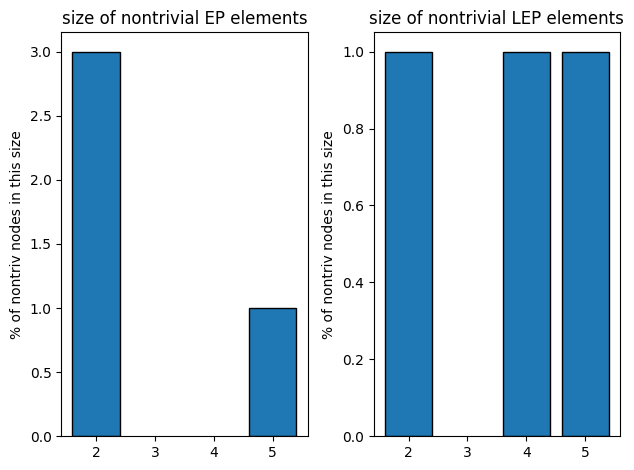

In [5]:
#
nontEp,nontLep, hist_list, perc = graphs.NontrivialityData(G,ep,lep_list,verbose=True,include_pairs=True,
                                                           return_vals=True,show_progress=False)

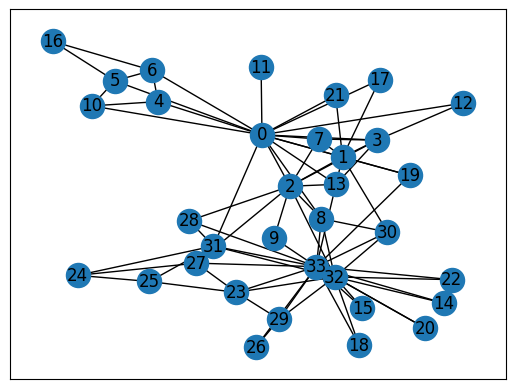

In [6]:
nx.draw_networkx(G)

In [7]:
#ep

In [8]:
#lep_list

In [9]:
# Sebastian 
# protein-protein networks

#watts-strogetz theoretical network

# Analysis of Flies Brain Network

In [10]:
os.listdir()

['computing_equitable_partitions_of_graphs.pdf',
 '.DS_Store',
 'ep_finder.py',
 'geometric_leps.pdf',
 '__pycache__',
 'test.py',
 'README.md',
 'lep_finder.py',
 'Jupyter_notebooks',
 'facebook_combined.txt',
 '.gitignore',
 'test_lugar.py',
 'ErdosReyni_leps.pdf',
 '.git',
 'graphs.py',
 'ep_utils.py',
 'Data']

In [2]:
os.chdir('Data/Biological_Networks/Brain_Networks')
#os.chdir('Brain_Networks')

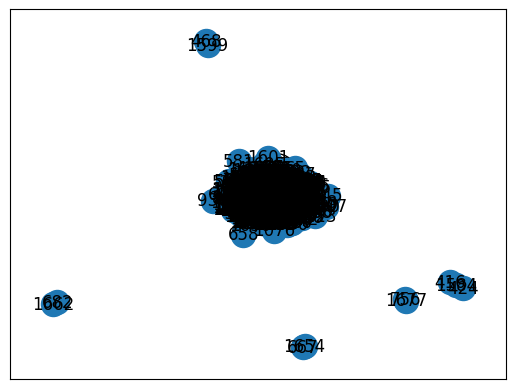

In [4]:
nx.draw_networkx(flies)

In [3]:
flies = nx.read_edgelist('bn-fly-drosophila_medulla_1.txt',delimiter=' ')
#graphs.relabel(flies)

In [6]:
epFlies, lepFlies = ep_utils.getEquitablePartitions(flies, progress_bars=True)

COMPUTING LEPS...  |████████████████████████████████████████| 4903/4903 [100%] in 0.0s (309809.09/s) 


Total percentage on nontrivial nodes: 0.12970241437394722
Total pairs in partition elements: 58
Percentage of nontrivial nodes in pairs: 0.5021645021645021


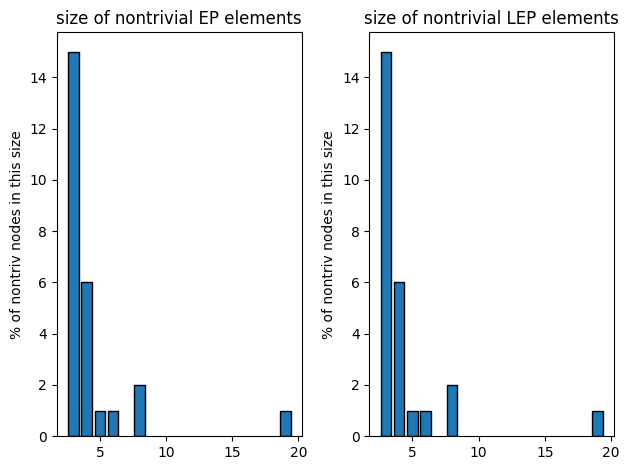

In [7]:
ntep,ntlep,h,perc = graphs.NontrivialityData(flies,epFlies,lepFlies, return_vals=True, verbose=True,show_progress=False)



# Cat brain network analysis

In [8]:
cats = nx.read_edgelist('bn-cat-mixed-species_brain_1.txt')
#graphs.relabel(cats)

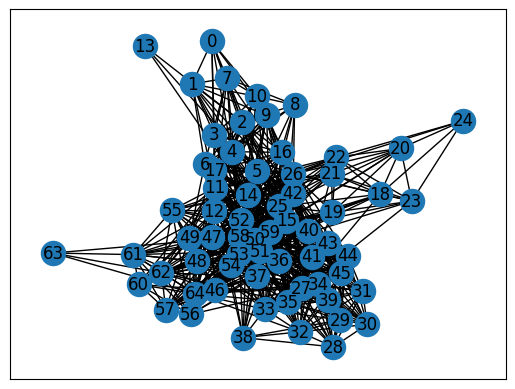

In [19]:
nx.draw_networkx(cats)

In [10]:
epCats, lepCats = ep_utils.getEquitablePartitions(cats, progress_bars=True)

COMPUTING LEPS...  |████████████████████████████████████████| 196/196 [100%] in 0.0s (114446.74/s) 


executed here!!!
There were no nontrivial nodes...


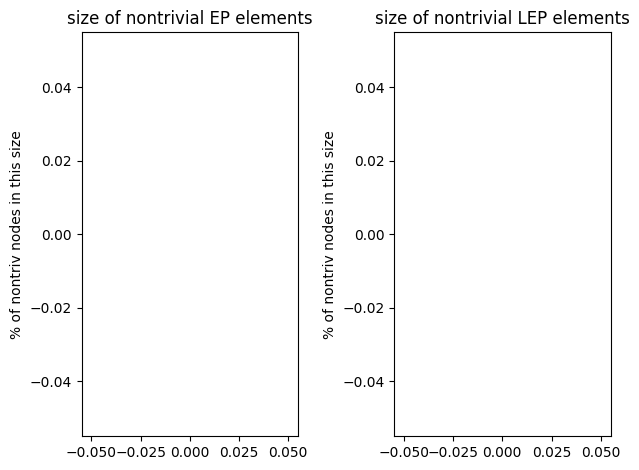

In [11]:
ntepc,ntlepc,hc,percc = graphs.NontrivialityData(cats,epCats,lepCats, return_vals=True, verbose=True,show_progress=False)


# Human brain network analysis

In [ ]:
#hum = nx.read_edgelist('bn-human-BNU_1_0025864_session_1-bg.txt')
#graphs.relabel(hum)


In [ ]:
epHum, lepHum, coarsestHum = ep_utils.getEquitablePartitionsFromFile('bn-human-BNU_1_0025864_session_1-bg.txt',delim=' ',progress_bars=True)


In [ ]:
nteph,ntleph,hh,perch = graphs.NontrivialityData(hum,epHum,lepHum, return_vals=True, verbose=True,show_progress=False)



# Gene Networks analysis

## network 1

In [2]:
os.getcwd()

'/Users/josephhenderson/Desktop/Research/EquitablePartitions'

In [3]:
os.chdir('Data/Biological_Networks')

In [4]:
os.listdir()

['bio-DM-LC',
 'bio-grid-worm',
 '.DS_Store',
 'bio-CE-CX',
 'bio-grid-mouse',
 'bio-CE-HT',
 'bio-CE-PG',
 'bio-DR-CX',
 'bio-grid-plant',
 'Brain_Networks',
 'bio-DM-CX',
 'bio-dmela',
 'bio-HS-CX',
 'bio-CE-LC',
 'bio-CE-GT',
 'bio-celegans',
 'bio-CE-GN',
 'bio-DM-HT']

In [5]:
os.chdir('bio-CE-CX')

In [6]:
os.listdir()

['readme.html', 'bio-CE-CX.edges']

In [7]:
graph = pd.read_csv('bio-CE-CX.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

In [9]:
start = pc()
ep_utils.GetSpectrumFromLEPs(graph)
end = pc()

ours = end-start

## network 2

In [10]:
os.chdir('../bio-CE-HT')

In [11]:
graph = pd.read_csv('bio-CE-HT.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

In [12]:
start = pc()
ep_utils.GetSpectrumFromLEPs(graph)
end = pc()

ours = end-start

0 out of 1617
1000 out of 1617
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [13]:
start = pc()
nx.adjacency_spectrum(graph)
end = pc()

theirs = end-start

In [15]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 2:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 2:
	ours: 5.146250653997413
	theirs: 10.765906660002656


In [16]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 4912/4912 [100%] in 0.0s (347233.68/s) 
Percentage of Nontrivial nodes:	0.4742071073748567
Density of the graph:	0.00043584983929041015


## network 3

In [17]:
os.chdir('../bio-CE-LC')

In [18]:
graph = pd.read_csv('bio-CE-LC.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

In [19]:
start = pc()
ep_utils.GetSpectrumFromLEPs(graph)
end = pc()

ours = end-start

0 out of 618
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [20]:
start = pc()
nx.adjacency_spectrum(graph)
end = pc()

theirs = end-start

In [21]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 3:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 3:
	ours: 1.0359385649935575
	theirs: 1.9947110259963665


In [22]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 1879/1879 [100%] in 0.0s (252305.15/s) 
Percentage of Nontrivial nodes:	0.6467195385724586
Density of the graph:	0.000856651708183259


## network 4

In [23]:
os.chdir('../bio-CE-GT')

In [24]:
graph = pd.read_csv('bio-CE-GT.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

In [25]:
start = pc()
ep_utils.GetSpectrumFromLEPs(graph)
end = pc()

ours = end-start

0 out of 715
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [26]:
start = pc()
nx.adjacency_spectrum(graph)
end = pc()

theirs = end-start

In [27]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 4:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 4:
	ours: 1.3827712119964417
	theirs: 0.8248825499904342


In [28]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 2149/2149 [100%] in 0.0s (311525.17/s) 
Percentage of Nontrivial nodes:	0.3181818181818182
Density of the graph:	0.003793735124903956


## network 5

In [29]:
os.chdir('../bio-CE-GN')

In [30]:
graph = pd.read_csv('bio-CE-GN.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

In [31]:
ours, theirs, acc = graphs.DuelOfMethods(graph)

0 out of 2057
1000 out of 2057
2000 out of 2057
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [32]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 5:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 5:
	ours: 9.438664150991826
	theirs: 6.402403140004026


In [33]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 6172/6172 [100%] in 0.0s (147332.88/s) 
Percentage of Nontrivial nodes:	0.10810810810810811
Density of the graph:	0.01089258177096015


## network 6

In [34]:
os.chdir('../bio-DR-CX')

graph = pd.read_csv('bio-DR-CX.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

ours, theirs, acc = graphs.DuelOfMethods(graph)

0 out of 3180
1000 out of 3180
2000 out of 3180
3000 out of 3180
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [35]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 6:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 6:
	ours: 23.38177558800089
	theirs: 16.27031269299914


In [36]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 9541/9541 [100%] in 0.1s (140705.11/s) 
Percentage of Nontrivial nodes:	0.05016722408026756
Density of the graph:	0.007852076275146589


## network 7

In [37]:
os.chdir('../bio-DM-CX')

graph = pd.read_csv('bio-DM-CX.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

ours, theirs, acc = graphs.DuelOfMethods(graph)

0 out of 3833
1000 out of 3833
2000 out of 3833
3000 out of 3833
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [38]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 7:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 7:
	ours: 32.82428169000195
	theirs: 28.84604942999431


In [39]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 11500/11500 [100%] in 0.1s (169530.13/s) 
Percentage of Nontrivial nodes:	0.08044554455445545
Density of the graph:	0.004700335751396922


## network 8

In [40]:
os.chdir('../bio-HS-CX')

graph = pd.read_csv('bio-HS-CX.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

ours, theirs, acc = graphs.DuelOfMethods(graph)

0 out of 4192
1000 out of 4192
2000 out of 4192
3000 out of 4192
4000 out of 4192
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [41]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 8:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 8:
	ours: 41.382218710001325
	theirs: 35.220520350994775


In [42]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 12577/12577 [100%] in 0.2s (51109.24/s) 
Percentage of Nontrivial nodes:	0.07613868116927261
Density of the graph:	0.005587697473561546


## network 9

In [43]:
os.chdir('../bio-CE-PG')

graph = pd.read_csv('bio-CE-PG.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

ours, theirs, acc = graphs.DuelOfMethods(graph)

0 out of 1709
1000 out of 1709
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [44]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 9:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 9:
	ours: 5.956939940995653
	theirs: 3.500916948003578


In [45]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 5134/5134 [100%] in 0.0s (188220.58/s) 
Percentage of Nontrivial nodes:	0.12185996793158739
Density of the graph:	0.013641501656410926


## network 10

In [46]:
os.chdir('../bio-DM-HT')

graph = pd.read_csv('bio-DM-HT.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

ours, theirs, acc = graphs.DuelOfMethods(graph)

0 out of 2066
1000 out of 2066
2000 out of 2066
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [47]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 10:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 10:
	ours: 6.947851151009672
	theirs: 10.97393934399588


In [48]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 6220/6220 [100%] in 0.0s (307886.15/s) 
Percentage of Nontrivial nodes:	0.4238875878220141
Density of the graph:	0.000521595801086643


## network 11

In [49]:
os.chdir('../bio-DM-LC')

graph = pd.read_csv('bio-DM-LC.edges',header=None,delimiter=' ',usecols=[0,1])
graph = graph.rename({0:'source',1:'target'},axis=1)
graph = nx.from_pandas_edgelist(graph)

ours, theirs, acc = graphs.DuelOfMethods(graph)

0 out of 333
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum


In [50]:
our_times.append(ours)
their_times.append(theirs)
print(f"Analysis of Network 11:\n\tours: {ours}\n\ttheirs: {theirs}")

Analysis of Network 11:
	ours: 0.3663603629975114
	theirs: 0.23363388099824078


In [51]:
getNontrivPerc(graph)

COMPUTING LEPS...  |████████████████████████████████████████| 1018/1018 [100%] in 0.0s (275265.55/s) 
Percentage of Nontrivial nodes:	0.6139817629179332
Density of the graph:	0.0026076070989735868


In [14]:
our_times = []
their_times = []

def RunAnalysis(graph_name,ext='.edges'):
    os.chdir("../" + graph_name)
    print("reading in graph")
    graph = pd.read_csv(graph_name+ext,header=None,delimiter=' ',usecols=[0,1])
    graph = graph.rename({0:'source',1:'target'},axis=1)
    graph = nx.from_pandas_edgelist(graph)
    
    print("dueling methods")
    ours, theirs, acc = graphs.DuelOfMethods(graph)
    
    our_times.append(ours)
    their_times.append(theirs)
    print(f"Analysis of Network 11:\n\tours: {ours}\n\ttheirs: {theirs}")
    
    print('calculating nontriviality stats')
    getNontrivPerc(graph)

## network 12

In [ ]:
RunAnalysis('bio-grid-worm')

reading in graph
dueling methods
0 out of 1


## network 13

In [9]:
RunAnalysis('bio-grid-plant')

reading in graph
dueling methods
0 out of 1
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
Analysis of Network 11:
	ours: 529.8115633109992
	theirs: 506.74296804999176
calculating nontriviality stats
COMPUTING LEPS...  |████████████████████████████████████████| 4/4 [100%] in 0.0s (136.31/s) 
Percentage of Nontrivial nodes:	1.0
Density of the graph:	4.0342101016620945e-05


## network 14

In [10]:
RunAnalysis('bio-grid-mouse')

reading in graph
dueling methods
0 out of 1
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
Analysis of Network 11:
	ours: 78.05577252700459
	theirs: 77.58809232799103
calculating nontriviality stats
COMPUTING LEPS...  |████████████████████████████████████████| 4/4 [100%] in 0.0s (218.43/s) 
Percentage of Nontrivial nodes:	1.0
Density of the graph:	7.638252367858234e-05


## network 15

In [12]:
os.listdir()

['readme.html', 'bio-CE-CX.edges']

In [15]:
RunAnalysis('bio-dmela',ext='.mtx')

reading in graph
dueling methods
0 out of 6313
1000 out of 6313
2000 out of 6313
3000 out of 6313
4000 out of 6313
5000 out of 6313
6000 out of 6313
now getting total divisor spectrum
creating counter
subtracting counter
returning spectrum
Analysis of Network 11:
	ours: 152.12961747098598
	theirs: 207.06661762799195
calculating nontriviality stats
COMPUTING LEPS...  |████████████████████████████████████████| 18985/18985 [100%] in 0.1s (299988.59/s) 
Percentage of Nontrivial nodes:	0.22515212981744423
Density of the graph:	0.00046759661174861403


## network 16

In [ ]:
RunAnalysis('bio-celegans')

# Creating figure of speed comparison

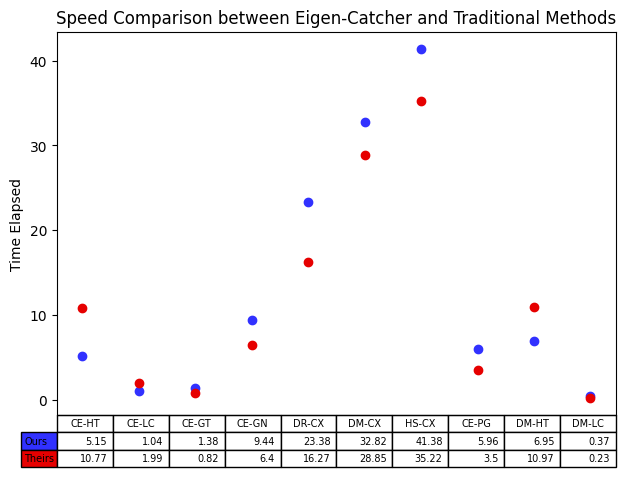

In [71]:
data = np.array([our_times,their_times])
data = np.round(data,2)

rows = ('Ours','Theirs')
columns = ['CE-HT','CE-LC','CE-GT','CE-GN','DR-CX','DM-CX','HS-CX','CE-PG','DM-HT','DM-LC']
  
# Get some pastel shades for the colors
colors = plt.cm.seismic(np.linspace(.3, .8, len(rows)))
n_rows = len(data)
  
index = np.arange(len(columns)) + 0.3
bar_width = 0.4
  
# Initialize the vertical-offset for
# the line plots.
y_offset = np.zeros(len(columns))
  
# Plot line plots and create text labels 
# for the table
cell_text = []
for row in range(n_rows):
    plt.plot(index, data[row], 'o',color=colors[row])
    y_offset = data[row]
    cell_text.append([x for x in y_offset])
  
# Reverse colors and text labels to display
# the last value at the top.
# colors = colors[::-1]
# cell_text.reverse()
  
# Add a table at the bottom of the axes
lik_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')
  
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
  
plt.ylabel("Time Elapsed")#.format(value_increment))
plt.xticks([])
plt.title('Speed Comparison between Eigen-Catcher and Traditional Methods')
  
plt.tight_layout()

#plt.savefig("likelihood_table.png",bbox_inches='tight')